# Electrical Fault detection

Aim - To predict faults in a power system.

# Dataset Desciption

The dataset contains one file 

detect_dataset.csv

shape of the dataset is (12001, 9)

# Columns in dataset

there are seven columns

'Output (S)',

'Ia',

'Ib',

'Ic',

'Va', 

'Vb', 

'Vc', 

'Unnamed: 7',

'Unnamed: 8'

Outputs - 0 (No-fault) or 1(Fault is present)

In [1]:
# Importing Necessary Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [67]:
# Reading the csv file using pandas

data = pd.read_csv('/content/detect_dataset.csv')

In [3]:
data.head()

,Output (S),Ia,Ib,Ic,Va,Vb,Vc,Unnamed: 7,Unnamed: 8
0,0,-170.472196,9.219613,161.252583,0.054490,-0.659921,0.605431,NaN,NaN
1,0,-122.235754,6.168667,116.067087,0.102000,-0.628612,0.526202,NaN,NaN
2,0,-90.161474,3.813632,86.347841,0.141026,-0.605277,0.464251,NaN,NaN
3,0,-79.904916,2.398803,77.506112,0.156272,-0.602235,0.445963,NaN,NaN
4,0,-63.885255,0.590667,63.294587,0.180451,-0.591501,0.411050,NaN,NaN


# Basic EDA

In [68]:
#checking shape of the dataset

data.shape

(12001, 9)

In [5]:
# checking columns of dataset

data.columns

Index(['Output (S)', 'Ia', 'Ib', 'Ic', 'Va', 'Vb', 'Vc', 'Unnamed: 7',
       'Unnamed: 8'],
      dtype='object')

In [6]:
# checking length of dataset

print('dataset length:',len(data))

dataset length: 12001


In [8]:
# Checking which columns have categorical, numerical or boolean values

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12001 entries, 0 to 12000
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Output (S)  12001 non-null  int64  
 1   Ia          12001 non-null  float64
 2   Ib          12001 non-null  float64
 3   Ic          12001 non-null  float64
 4   Va          12001 non-null  float64
 5   Vb          12001 non-null  float64
 6   Vc          12001 non-null  float64
 7   Unnamed: 7  0 non-null      float64
 8   Unnamed: 8  0 non-null      float64
dtypes: float64(8), int64(1)
memory usage: 843.9 KB


In [9]:
# For more information on the dataset like the total count in all the columns,min, max values

data.describe()


,Output (S),Ia,Ib,Ic,Va,Vb,Vc,Unnamed: 7,Unnamed: 8
count,12001.000000,12001.000000,12001.000000,12001.000000,12001.000000,12001.000000,12001.000000,0.0,0.0
mean,0.457962,6.709369,-26.557793,22.353043,0.010517,-0.015498,0.004980,NaN,NaN
std,0.498250,377.158470,357.458613,302.052809,0.346221,0.357644,0.349272,NaN,NaN
min,0.000000,-883.542316,-900.526951,-883.357762,-0.620748,-0.659921,-0.612709,NaN,NaN
25%,0.000000,-64.348986,-51.421937,-54.562257,-0.237610,-0.313721,-0.278951,NaN,NaN
50%,0.000000,-3.239788,4.711283,-0.399419,0.002465,-0.007192,0.008381,NaN,NaN
75%,1.000000,53.823453,69.637787,45.274542,0.285078,0.248681,0.289681,NaN,NaN
max,1.000000,885.738571,889.868884,901.274261,0.609864,0.627875,0.608243,NaN,NaN


In [10]:
# Missing values in all the columnns of the dataset

data.isnull().sum()

Output (S)        0
Ia                0
Ib                0
Ic                0
Va                0
Vb                0
Vc                0
Unnamed: 7    12001
Unnamed: 8    12001
dtype: int64

In [11]:
# Unique values of each column

data.nunique()


Output (S)        2
Ia            12001
Ib            12001
Ic            12001
Va            11996
Vb            11813
Vc            11987
Unnamed: 7        0
Unnamed: 8        0
dtype: int64

In [69]:
# dropping 'Unnamed: 7' and 'Unnamed: 8'

data.drop(columns=['Unnamed: 7','Unnamed: 8'], inplace=True)

In [70]:
# checking total number of fault and no-fault instances

data['Output (S)'].value_counts()

0    6505
1    5496
Name: Output (S), dtype: int64

# Correlation Matrix

In [71]:
# Using pandas

corr = data.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  after removing the cwd from sys.path.


,Output (S),Ia,Ib,Ic,Va,Vb,Vc
Output (S),1.00,0.04,-0.13,0.12,-0.04,0.01,0.02
Ia,0.04,1.00,-0.38,-0.28,0.03,-0.16,0.13
Ib,-0.13,-0.38,1.00,-0.53,-0.03,0.03,-0.01
Ic,0.12,-0.28,-0.53,1.00,-0.00,-0.10,0.10
Va,-0.04,0.03,-0.03,-0.00,1.00,-0.51,-0.47
Vb,0.01,-0.16,0.03,-0.10,-0.51,1.00,-0.52
Vc,0.02,0.13,-0.01,0.10,-0.47,-0.52,1.00


# Histogram

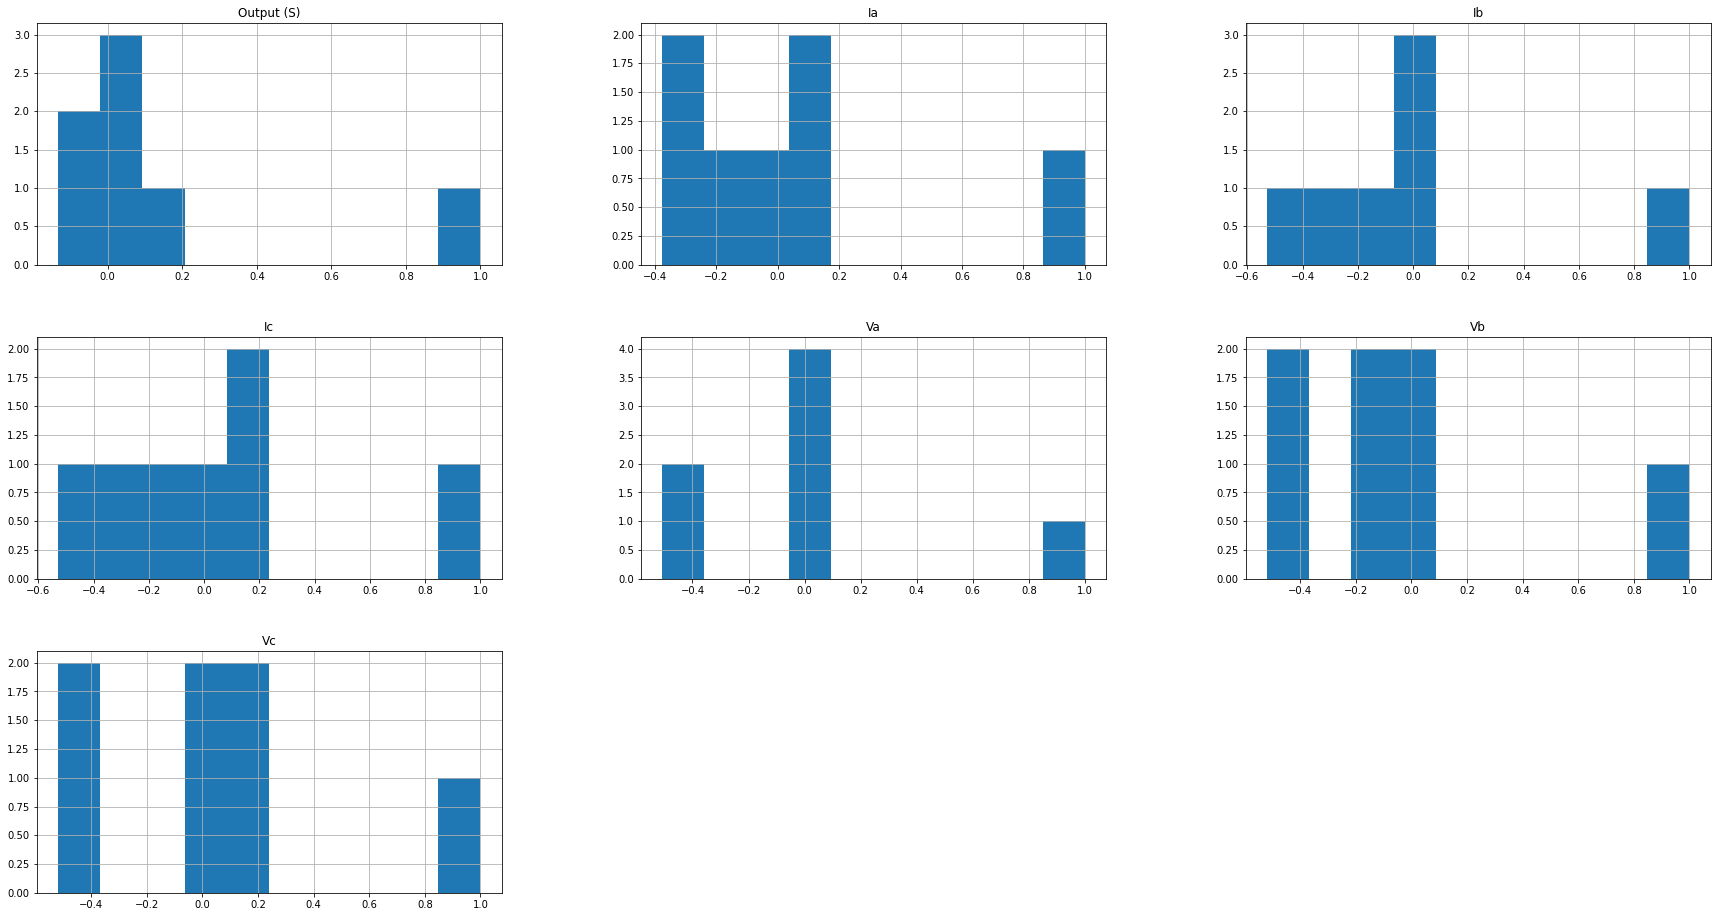

In [18]:
# Histogram using pandas 

data.hist(figsize=(30,16));

### Count plot

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


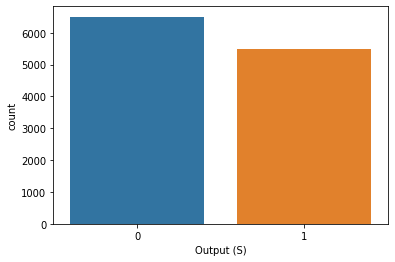

In [25]:
# count plot of Output (S) column

sns.countplot(data['Output (S)'])


# Box plot

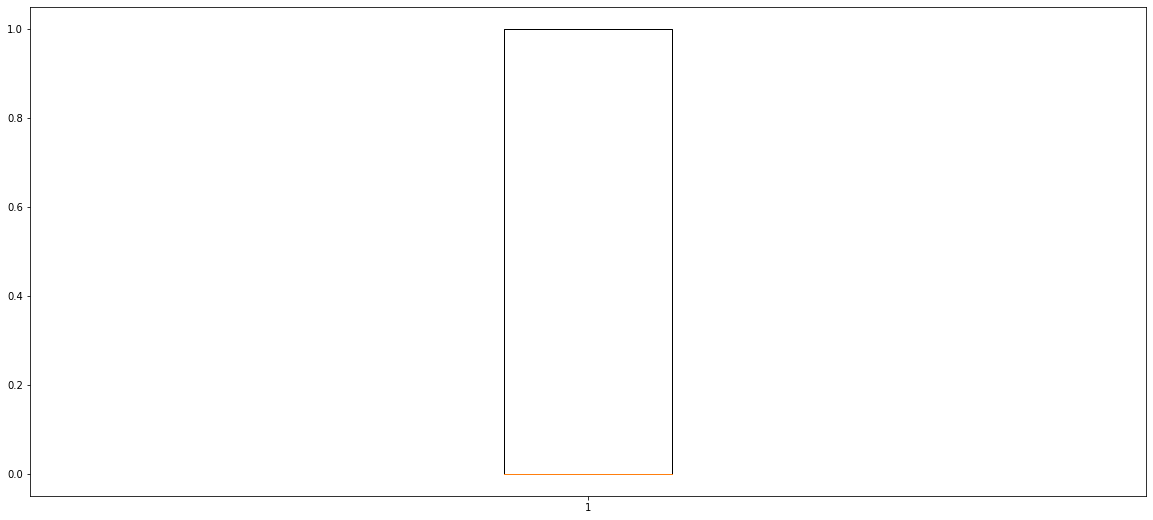

In [26]:
# box plot using pandas 
# box plot for Output (S) column 

plt.figure(figsize=(20,9))
plt.boxplot(x=data['Output (S)']);


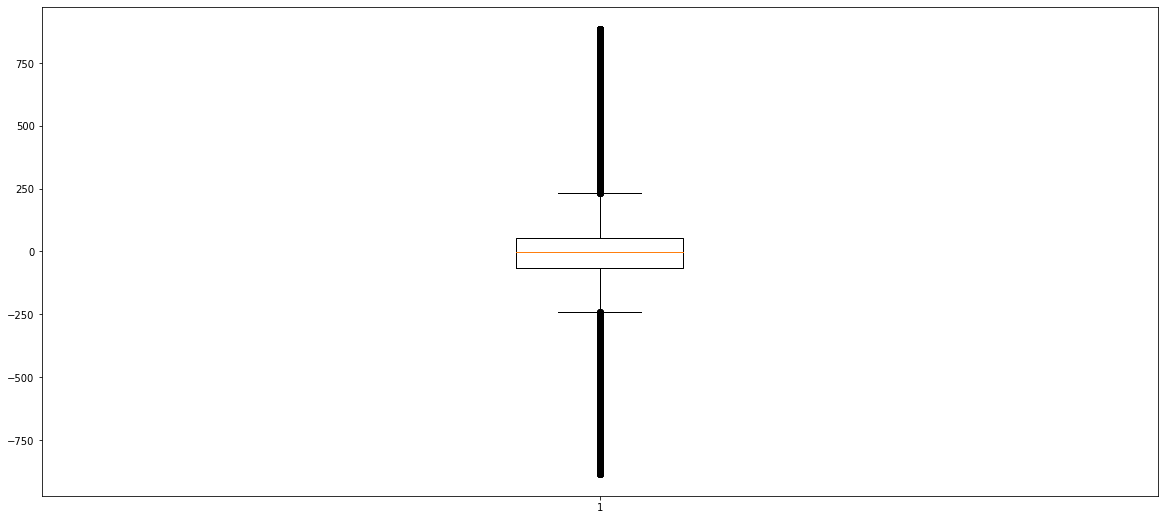

In [27]:
# box plot using pandas 
# box plot for Ia column 

plt.figure(figsize=(20,9))
plt.boxplot(x=data['Ia']);

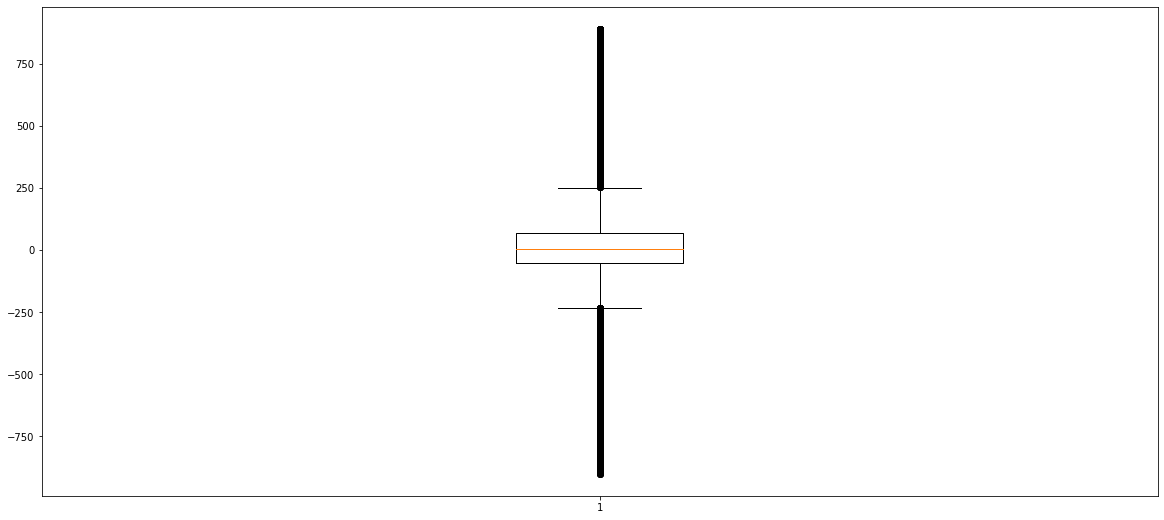

In [28]:
# box plot using pandas 
# box plot for Ib column 

plt.figure(figsize=(20,9))
plt.boxplot(x=data['Ib']);

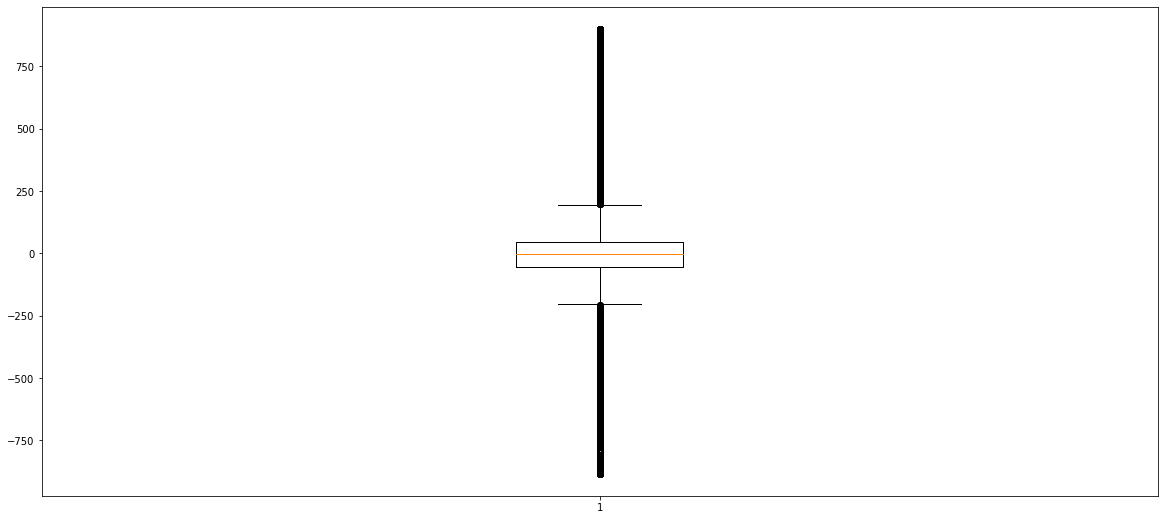

In [29]:
# box plot using pandas 
# box plot for Ic column 

plt.figure(figsize=(20,9))
plt.boxplot(x=data['Ic']);

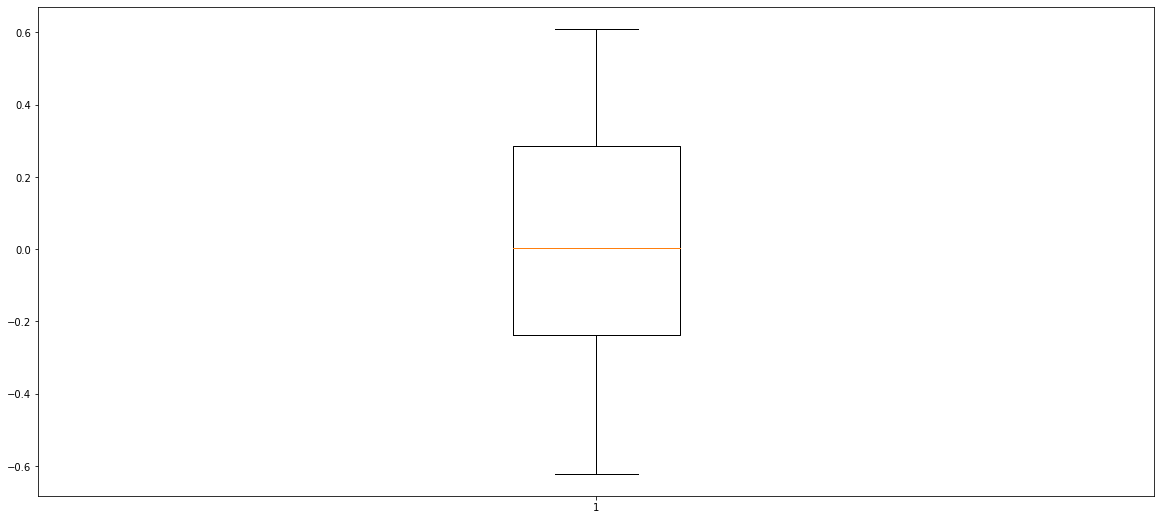

In [30]:
# box plot using pandas 
# box plot for Va column 

plt.figure(figsize=(20,9))
plt.boxplot(x=data['Va']);

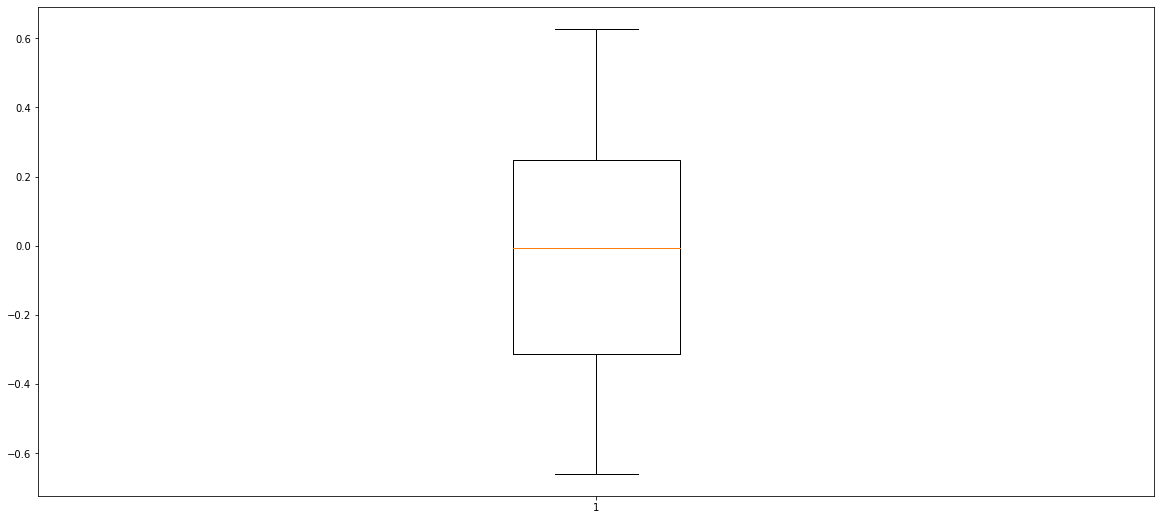

In [72]:
# box plot using pandas 
# box plot for Vb column 

plt.figure(figsize=(20,9))
plt.boxplot(x=data['Vb']);

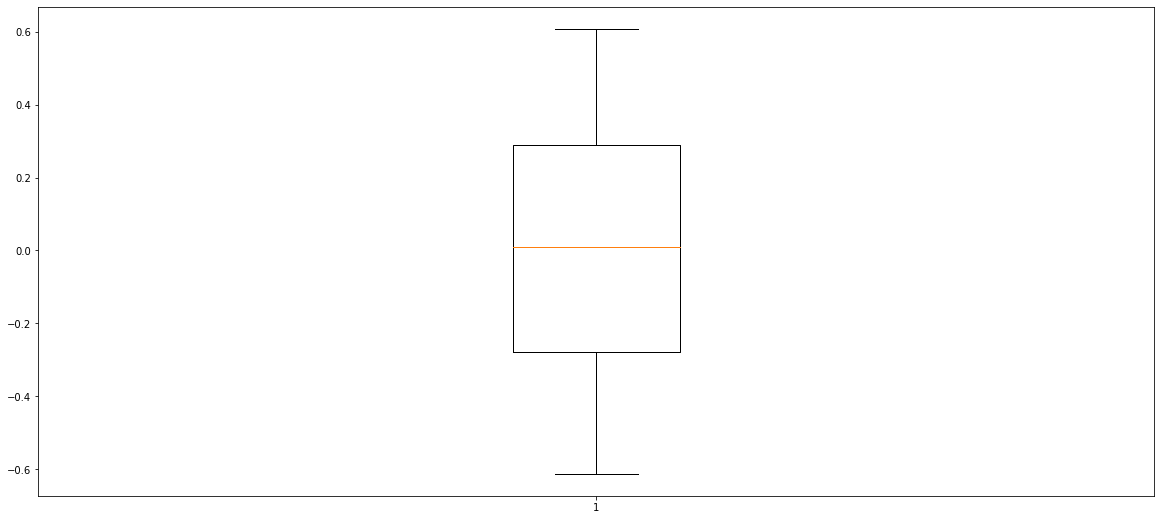

In [31]:
# box plot using pandas 
# box plot for Vc column 

plt.figure(figsize=(20,9))
plt.boxplot(x=data['Vc']);

Dataset is balanced and not skewed in nature

# Dendrogram

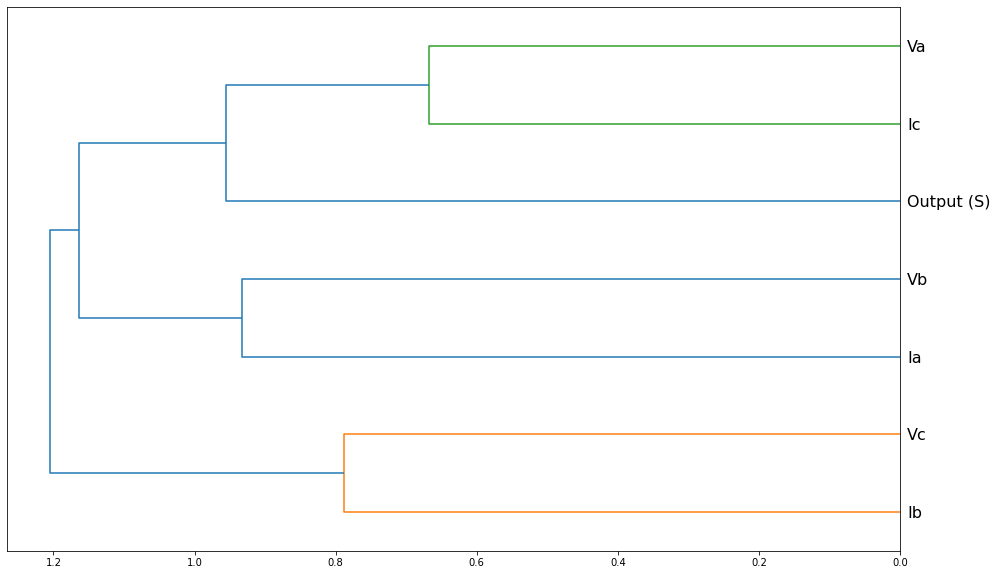

In [49]:
X = data.dropna()

import scipy
from scipy.cluster import hierarchy as hc

corr = np.round(scipy.stats.spearmanr(X).correlation, 4)
corr_condensed = hc.distance.squareform(1-corr)
z = hc.linkage(corr_condensed, method='average')
fig = plt.figure(figsize=(16,10))
dendrogram = hc.dendrogram(z,labels=X.columns, orientation='left', leaf_font_size=16)
plt.show()


# Preprocessing, Modeling and prediction on test data

In [85]:
X = data.drop(columns=['Output (S)'])
y = data['Output (S)']

print(X.shape, y.shape)

(12001, 6) (12001,)


In [86]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test =  train_test_split(X,y, test_size = 0.2, random_state = 123)

print(X_train.shape, y_train.shape)

print(X_test.shape , y_test.shape)

(9600, 6) (9600,)
(2401, 6) (2401,)


### Scaling

In [87]:
from sklearn.preprocessing import MinMaxScaler

scaled = MinMaxScaler()

X_train = scaled.fit_transform(X_train)

X_test = scaled.transform(X_test)


In [76]:
def visualize_importance(feature_importances, feat_train_df):

  # creating dataframe for feature name and feature importance
  feature_importance_df = pd.DataFrame()

  _df = pd.DataFrame()
  _df['feature_importance'] = feature_importances
  _df['column'] = feat_train_df.columns
  feature_importance_df = pd.concat([feature_importance_df, _df], 
                                    axis=0, ignore_index=True)
  

  # grouping all data and sorting in descending order
  order = feature_importance_df.groupby('column')\
      .sum()[['feature_importance']]\
      .sort_values('feature_importance', ascending=False).index[:50]

  # ploting feature importance data using boxenplot
  fig, ax = plt.subplots(figsize=(8, max(6, len(order)* .25)))
  sns.boxenplot(data=feature_importance_df, x='feature_importance', y='column', order=order, ax=ax, palette='viridis', orient='h')
  ax.tick_params(axis='x', rotation =0)
  ax.set_title('Importance')
  ax.grid()
  fig.tight_layout()

  return fig, ax




In [90]:
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, recall_score

import sklearn.metrics as metrics

## LogisticRegression

accuracy score: 0.721366097459392
precision score: 0.39347234814143245
recall score: 1.0
[[1298  669]
 [   0  434]]
CPU times: user 241 ms, sys: 196 ms, total: 437 ms
Wall time: 239 ms


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


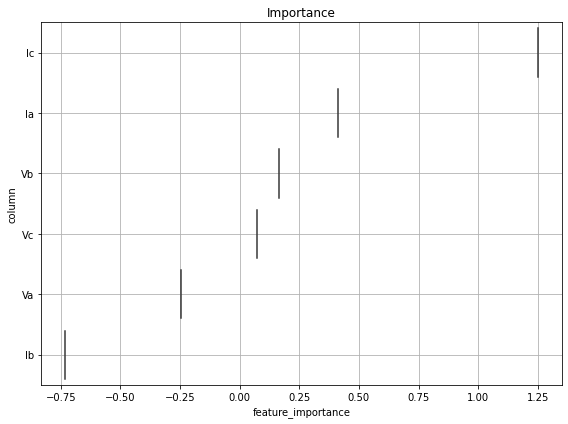

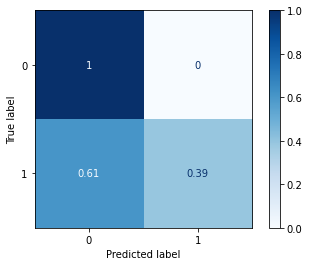

In [91]:
%%time
from sklearn.linear_model import LogisticRegression

log = LogisticRegression()

log.fit(X_train, y_train)

y_pred_log = log.predict(X_test)

print('accuracy score:', accuracy_score(y_pred_log, y_test))
print('precision score:', precision_score(y_pred_log, y_test))
print('recall score:', recall_score(y_pred_log, y_test))
print(confusion_matrix(y_pred_log, y_test))

fig, ax = visualize_importance(log.coef_[0], X)

disp = metrics.plot_confusion_matrix(log, X_test, y_test, cmap=plt.cm.Blues, normalize ='true')

## RandomForestClassifier

accuracy score: 0.9979175343606831
precision score: 1.0
recall score: 0.9954873646209387
[[1293    0]
 [   5 1103]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


CPU times: user 3.55 s, sys: 46.8 ms, total: 3.6 s
Wall time: 5.37 s


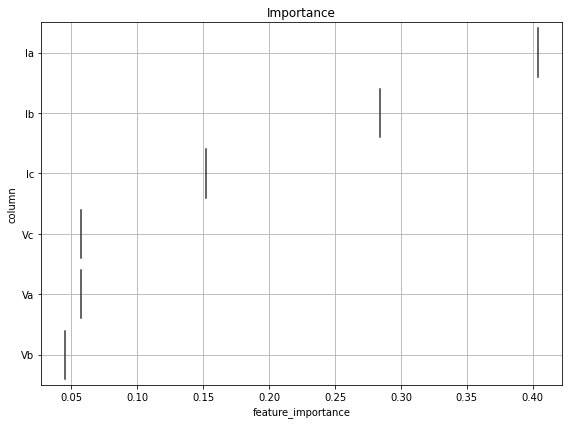

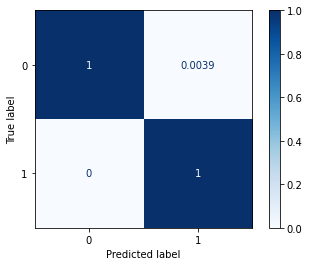

In [94]:
%%time
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators =200, max_depth=40)

rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

print('accuracy score:', accuracy_score(y_pred_rf, y_test))
print('precision score:', precision_score(y_pred_rf, y_test))
print('recall score:', recall_score(y_pred_rf, y_test))
print(confusion_matrix(y_pred_rf, y_test))

fig, ax = visualize_importance(rf.feature_importances_, X)

disp = metrics.plot_confusion_matrix(rf, X_test, y_test, cmap=plt.cm.Blues, normalize ='true')

## DecisionTreeClassifier

accuracy score: 0.9975010412328197
precision score: 1.0
recall score: 0.9945897204688909
[[1292    0]
 [   6 1103]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


CPU times: user 239 ms, sys: 48.3 ms, total: 288 ms
Wall time: 345 ms


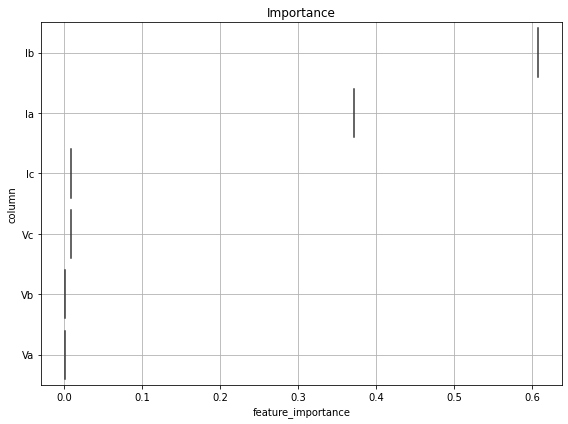

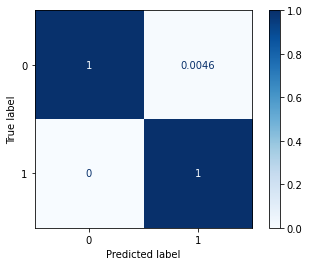

In [95]:
%%time
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()

dt.fit(X_train, y_train)

y_pred_dt = dt.predict(X_test)

print('accuracy score:', accuracy_score(y_pred_dt, y_test))
print('precision score:', precision_score(y_pred_dt, y_test))
print('recall score:', recall_score(y_pred_dt, y_test))
print(confusion_matrix(y_pred_dt, y_test))

fig, ax = visualize_importance(dt.feature_importances_, X)

disp = metrics.plot_confusion_matrix(dt, X_test, y_test, cmap=plt.cm.Blues, normalize ='true')

## GradientBoostingClassifier

accuracy score: 0.9966680549770929
precision score: 0.9963735267452403
recall score: 0.9963735267452403
[[1294    4]
 [   4 1099]]
CPU times: user 2.37 s, sys: 48.8 ms, total: 2.42 s
Wall time: 2.36 s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


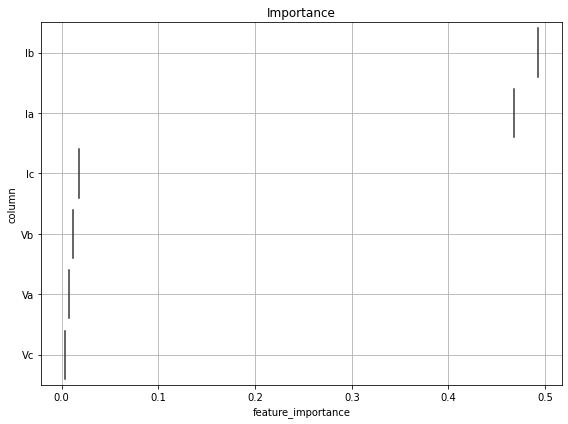

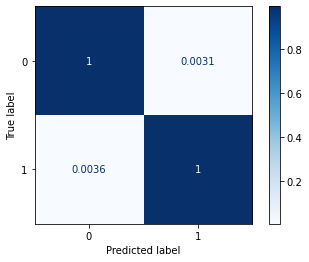

In [96]:
%%time
from sklearn.ensemble import GradientBoostingClassifier

GBR = GradientBoostingClassifier()

GBR.fit(X_train, y_train)

y_pred_GBR = GBR.predict(X_test)

print('accuracy score:', accuracy_score(y_pred_GBR, y_test))
print('precision score:', precision_score(y_pred_GBR, y_test))
print('recall score:', recall_score(y_pred_GBR, y_test))
print(confusion_matrix(y_pred_GBR, y_test))

fig, ax = visualize_importance(GBR.feature_importances_, X)

disp = metrics.plot_confusion_matrix(GBR, X_test, y_test, cmap=plt.cm.Blues, normalize ='true')

## Hyper parameter tunning

###RandomizedSearchCV


In [97]:
# Function to perform hyper parameter tunning with RandomizedSearchCV

def random_Search(model,X_train, Y_train,param_grid):
  from sklearn.model_selection import RandomizedSearchCV

  random = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=20, cv=3, verbose=2, random_state=42, n_jobs=-1)

  random.fit(X_train, y_train)
  
  print(random.best_params_)


In [98]:
%%time
rf_para_grid = {'n_estimators': [int(x) for x in np.linspace(start=200,  stop=2000, num=10)],
               'max_features': ['auto', 'sqrt'],
               'max_depth': [int(x) for x in np.linspace(10,110, num=11)],
                'min_samples_split' : [2,5,10],
               'min_samples_leaf': [1,2,4],
               'bootstrap': [True, False]}


random_Search(RandomForestClassifier(), X_train, y_train, param_grid=rf_para_grid)




Fitting 3 folds for each of 20 candidates, totalling 60 fits
{'n_estimators': 400, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 70, 'bootstrap': False}
CPU times: user 10.1 s, sys: 400 ms, total: 10.5 s
Wall time: 8min 51s


### working with best model

In [99]:
# Area under ROC of Model On Test Set

score = metrics.roc_auc_score(y_test, y_pred_rf)

print(f'Area under ROC of Model On Test Set -{score:,.2%}')

Area under ROC of Model On Test Set -99.81%


In [101]:
# Creating a dataframe with predicted result as data using best model

predictions = pd.DataFrame(y_pred_rf)


In [102]:
predictions.head()

,0
0,0
1,1
2,0
3,0
4,0


# Conclusion

According to this model, the predicted value matches with the actual target values. The model is performing well.  Performed EDA, preprocessing, built different models, visualized feature importance, did hyper parameter tunning and did the prediction as well.